# Sobre o projeto:

### Sistema de recomendação de produtos

Amazon, está entre maiores empresas do globo de tecnologia, e considerada uma das 5 Big Techs. Dentre vários setores do mercado como streaming, programação na nuvem, inteligência artificial, o que iremos analisar é o setor de e-commerce da empresa. O e-commerce da Amazon conta com milhares de produtos, categorias de produtos e é bem reconhecido pela qualidade e e agilidade no tempo de entrega, além de ter fortes algorítimos de recomendação para aumentar o número de vendas.

### Objetivo:

Com um dataset do e-commerce da Amazon, nosso foco será analisar correlações e identificar padrões e fazer uma análise de sentimentos para criar um modelo que consiga recomendar um produto para um cliente, baseado no perfil dele e nas características de cada produto.

# Entendimento dos dados

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from modeling_methods import Recommendation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

prot = Recommendation()

data = prot.open_data('Amazon.csv')
data


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

#### Dicionário de dados

In [2]:
data_dict = prot.create_data_dict()

df_dict = pd.DataFrame(data_dict)
df_dict

,Nome das variáveis,Tipo de dado,Descrição
0,product_id,object,Identificador único para cada produto
1,product_name,object,Nome do produto
2,category,object,Categoria do produto
3,discounted_price,object,Preço com desconto do produto
4,actual_price,object,Preço original do produto antes dos descontos
5,discount_percentage,object,Porcentagem do desconto concedido no produto
6,rating,object,Classificação média dada ao produtopelos usuários
7,rating_count,object,Número de usuários que avaliaram o produto
8,about_product,object,Descrição ou detalhes sobre o produto
9,user_id,object,Identificador exclusivo para cado usuário que ...


Conseguimos perceber que os preços em discounted_price e actual_price estão representados em Rupia Indiana, moeda oficial da India. Para facilitar uma dimensão melhor dos preços, vamos alterar s valores para Reais brasileiros.

No momento em que estamos analisando esses dados, 1 Real equivale a 16,86 Rupias, entretanto arrendondaremos para 17 Rupias.

In [4]:
# removendo caracteres especiais de colunas numericas
data = prot.remove_ec(data)

In [5]:
# convertendo de rupias para reais
data = prot.transform_to_real(data)

A coluna category contem o caminho a ser seguido pelo usuário para comprar tal produto, portando iremos simplicficar os dados, deixando a categoria com nivel mais amplo.

Há valores nulos em rating_counts, como são apenas dois iremos drop-los, pois caso adicionemos valores, pode acabar distorcendo nosso algorítimo.

In [6]:
data['category'] = data['category'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else x)
data.dropna(inplace=True)

data.category.value_counts()

Electronics              526
Computers&Accessories    451
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: category, dtype: int64

Com os dados tratados, está na hora de gerarmos alguns insights sobre eles, e para isso criaremos um dataframe para vizualizar.

* No caso da célula abaixo apresentar algum erro após ser rodada, rode-a novamente que será solucionado

In [7]:
data_analysis = prot.create_df_insight(data)
data_analysis

,Questão,Resposta,Preço Atual
0,Número de produtos unicos,1349,NaN
1,Preço médio,320.65,NaN
2,Produto mais vendido,AmazonBasics Flexible Premium HDMI Cable (Blac...,41.18
3,Produto menos vendido,Khaitan ORFin Fan heater for Home and kitchen-...,146.76
4,Produto mais avaliado,Syncwire LTG to USB Cable for Fast Charging Co...,117.59
5,Produto menos avaliado,Eureka Forbes car Vac 100 Watts Powerful Sucti...,147.00
6,Produto mais caro,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,8229.41
7,Produto mais barato,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,2.29
8,Produto com maior desconto,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",294.06
9,Média de classificalção para cada produto,17644.501853,NaN


### Insights
 - Produtos com altas avaliações POSITIVAS tentem a vender MAIS
 - Produtos com altas avaliações NEGATIVAS tendem a vender MENOS
 - O preço impacta negativamente as avaliações: produtos com menos avaliações tendem a ser mais caros que a média
  
Isso sugere que há uma forte correlação entre as avaliações, quantidade de vendas e preços. A satisfação do cliente parece impulsionar as vendas, e o preço desemenha um papel significativo no volume de vendas e na percepção de valor para o cliente.

Vamos vizualizar agora os 10 protudos mais vendidos:

In [8]:
top_prod = prot.top_product(data)
top_prod

,product_name,rating,rating_count
0,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426973.0
1,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",4.4,426973.0
2,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4.4,426973.0
3,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426972.0
4,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713.0
5,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713.0
6,boAt BassHeads 100 in-Ear Wired Headphones wit...,4.1,363711.0
7,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",4.1,313836.0
8,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",4.1,313836.0
9,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",4.1,313832.0


Nota-se que aparentemente os produtos mais vendidos voltados a tecnológicos/ eletrônicos. Isso pode ser de suma relevância para avaliar o modelo posteiormente.

Vamos aproveitar para ver as 1o principais categorias também

In [9]:
top_category = prot.top_categories(data)
top_category

,Category,Count
1,Electronics,526
0,Computers&Accessories,451
4,Home&Kitchen,448
3,OfficeProducts,31
2,MusicalInstruments,2
5,HomeImprovement,2
6,Toys&Games,1
7,Car&Motorbike,1
8,Health&PersonalCare,1


### Como o preço com desconto, e sem desconto impactam nas avaliações?

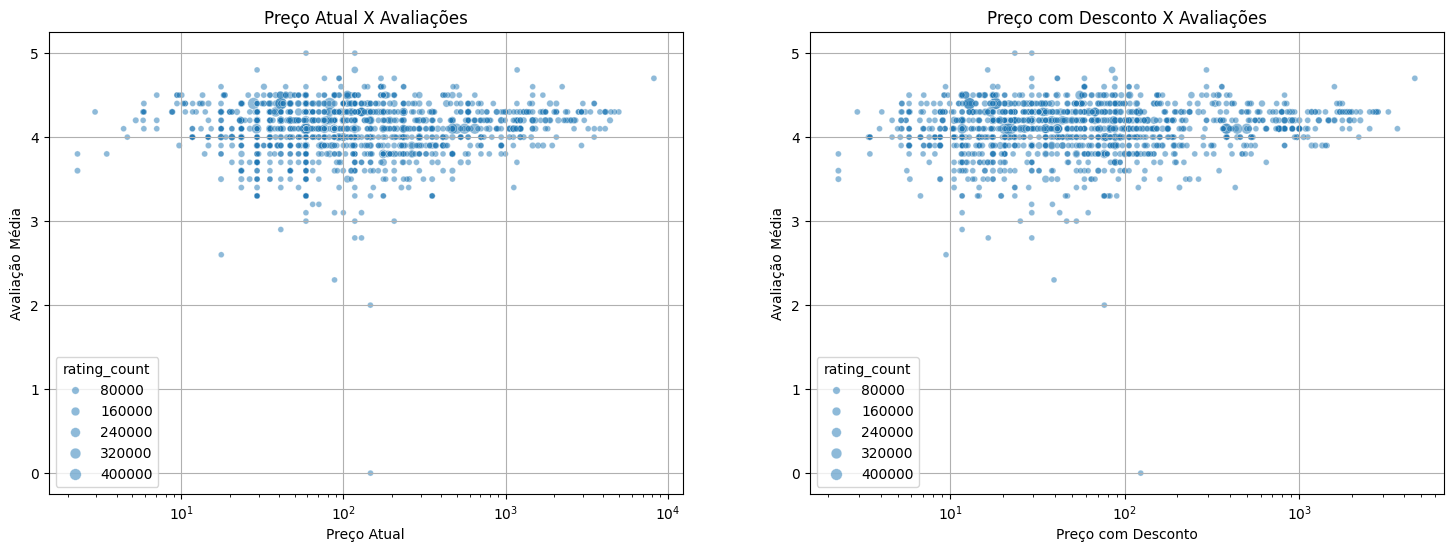

In [10]:
prot.avaliation_graphic(data)

Com essa análise conseguimos observar que o preço com desconto não influência tanto nas vendas, o que nos leva a crer que o cliente leva mais em conta a qualidade do produto e as avaliações do que o preço.

# Análise de sentimento

Essa parte é muito importante para nosso algorítimo de recomendação, através dela poderemos identificar as principais correlações.

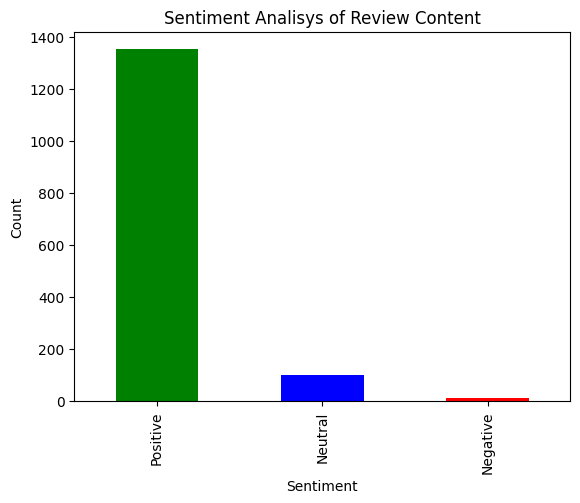

In [11]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'
    

# aplicando analise de sentimentos
reviews = data['review_content']
reviews_sentiments = reviews.apply(sentiment_analysis)

# contando numero de ocorrências de cada sentimento
sentiment_counts = reviews_sentiments.value_counts()

sentiment_counts.plot(kind='bar', color = ['green', 'blue', 'red'], title = 'Sentiment Analisys of Review Content')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
data['Sentiment'] = reviews_sentiments


positive_example = data[data['Sentiment'] == 'Positive'].iloc[0]['review_content']
neutral_example = data[data['Sentiment'] == 'Neutral'].iloc[0]['review_content']
negative_example = data[data['Sentiment'] == 'Negative'].iloc[0]['review_content']

print('Exemplos de sentimentos:')
example_reviews = pd.DataFrame({
    'Sentiment' : ['Positive', 'Negative', 'Neutral'],
    'Review': [positive_example, negative_example, neutral_example]
})

example_reviews

Exemplos de sentimentos:


,Sentiment,Review
0,Positive,Looks durable Charging is fine tooNo complains...
1,Negative,"Overall good.,TV picture ok smart betterSound ..."
2,Neutral,I am posting this after a few weeks of using t...


Com base nos dados, percebemos que é discrepante a diferença entre as avaliações, sendo muito superior a avaliação Positiva. Isso pode significar algumas coisas:
 - Os produtos possuem uma qualidade condizente com o anúncio e com o preço, logo o cliente fica satisfeito com a compra.
 - Os produtos foram entregues corretamente (não houve engano de produtos, coisa que é até comum ao realizar compras, principalmente online).
 - Não houve danificação na compra.
 - O prazo de entrega foi atendido

# Criação do modelo

In [13]:
# removendo colunas que não serão mais úteis para o modelo
drop_col = ['discounted_price', 'actual_price', 'discount_percentage']

data2 = data.drop(columns= drop_col)

In [14]:
# preparando modelo
tfidf_matrix = prot.prep_model(data2)

In [15]:
# fitando e transformando colunas de sentimentos
label_encoder = LabelEncoder()

data2['Cod Sentimento'] = label_encoder.fit_transform(data2['Sentiment'])

In [16]:
# matriz de similaridade
cosine_sim = cosine_similarity(tfidf_matrix)

cosine_sim.shape

(1463, 1463)

Agora, vamos criar uma função que receba um ID de produto como entrada e produza uma lista de produtos recomendados com base nessa abordagem. 

In [17]:
product_user_matrix = data2.pivot_table(index='product_id', values='rating', aggfunc='mean')

product_user_matrix = product_user_matrix.fillna(product_user_matrix.mean())

product_user_matrix.head()

,rating
product_id,
B002PD61Y4,4.1
B002SZEOLG,4.2
B003B00484,4.3
B003L62T7W,4.3
B004IO5BMQ,4.5


Na função abaixo, construiremos um sistema de recomendação híbrido integrando abordagens de filtragem colaborativa e baseada em conteúdo. Primeiro, para um determinado ID de produto, identificaremos produtos semelhantes usando filtragem baseada em conteúdo. Esta parte do sistema identifica produtos com características de conteúdo semelhantes. Em seguida, incorpora a filtragem colaborativa, examinando as classificações do produto alvo e encontrando outros produtos com classificações semelhantes, assumindo que produtos com classificações semelhantes possam atrair preferências de utilizadores semelhantes. Esses dois conjuntos de recomendações são então combinados, criando um conjunto de diversificação de recomendações que consideram tanto as características do conteúdo quanto os padrões de avaliações. O resultado final é uma lista dos principais produos recomendados com base neste método.

In [18]:
sample_product_id = data2['product_id'][0]
sample_product_name = data2['product_name'][0]
recommended_products = prot.hybrid_recommendation(sample_product_id, cosine_sim, product_user_matrix, data2)


recommended_products.head(10)

,product_id,product_name,rating
1158,B0BMTZ4T1D,!!1000 Watt/2000-Watt Room Heater!! Fan Heater...,4.5
1417,B09HS1NDRQ,PrettyKrafts Laundry Square Shape Basket Bag/F...,3.8
11,B0789LZTCJ,boAt Rugged v3 Extra Tough Unbreakable Braided...,4.2
785,B098R25TGC,Noise Buds VS201 V2 in-Ear Truly Wireless Earb...,3.8
274,B075TJHWVC,Airtel Digital TV HD Set Top Box with 1 Month ...,4.2
166,B07JPJJZ2H,Wayona Nylon Braided Lightning USB Data Sync &...,4.2
42,B07JW1Y6XV,Wayona Nylon Braided 3A Lightning to USB A Syn...,4.2
1204,B09KPXTZXN,Rico Japanese Technology Rechargeable Wireless...,4.0
1332,B0B9RZ4G4W,Amazon Basics 300 W Hand Blender with Stainles...,4.0
1345,B082ZQ4479,"Prestige PWG 07 Wet Grinder, 2L (Multicolor) w...",3.7


No geral, meu sistema de recomendação dá um bom resultado. Ele mostra um mix de produtos, alguns intimamente relacionados à consulta original e outros nem tanto. A presença de produtos semelhantes sugere que o componente de filtragem baseada em conteúdo está funcionando de forma eficaz, identificando produtos com características e descrições semelhantes. A combinação de produtos aparentemente não relacionados, como um aquecedor ambiente e uma varinha mágica, pode ser influenciada pela parte de filtragem colaborativa, que considera os padrões de avaliação dos utilizadores em diferentes produtos.

Além disso, ele tem um bom desempenho nestes fatores:

 - Relevância: alta relevância indica filtragem eficaz baseada em conteúdo.

 - Diversidade: O sistema contém uma combinação de produtos estreitamente relacionados e ligeiramente diferentes, que podem ser benéficos e oferecer aos utilizadores opções que talvez não tenham considerado.

 - Consistência de classificação: o modelo parece recomendar produtos com classificações geralmente altas, o que é bom para garantir recomendações de qualidade.


Globalmente, o modelo parece estar a funcionar razoavelmente bem, especialmente na identificação de produtos similares. No entanto, a inclusão de itens não relacionados sugere que pode haver espaço para melhorias, potencialmente no melhor ajuste do equilíbrio entre a filtragem baseada em conteúdo e a filtragem colaborativa ou no refinamento da seleção de recursos para a parte baseada em conteúdo.
